In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
full_df = pd.read_csv("../.local/benchmark_marlin.csv")
full_df

,M,K,num_reqs,num_models,dist,func_for_loop,func_improved,func_fp16
0,4096,4096,100,1,uniform,0.439552,0.417792,0.488448
1,4096,4096,100,1,uniform,0.429056,0.407552,0.402560
2,4096,4096,100,1,uniform,0.422912,0.407552,0.393216
3,4096,4096,100,1,uniform,0.421728,0.412672,0.396288
4,4096,4096,100,1,uniform,0.419840,0.407552,0.412672
...,...,...,...,...,...,...,...,...
75,4096,4096,100,100,zipf:1.5,9.598080,3.006656,9.787392
76,4096,4096,100,100,zipf:1.5,8.961216,2.842624,9.175072
77,4096,4096,100,100,zipf:1.5,10.032000,3.117056,10.145792
78,4096,4096,100,100,zipf:1.5,9.758720,3.095584,9.929824


In [16]:
results = []
for row in full_df.iterrows():
    results.append({
        "time": row[1]['func_for_loop'],
        "function": "for_loop",
        "num_models": row[1]['num_models'],
        "distribution": row[1]['dist']
    })
    results.append({
        "time": row[1]['func_fp16'],
        "function": "fp16",
        "num_models": row[1]['num_models'],
        "distribution": row[1]['dist']
    })
    results.append({
        "time": row[1]['func_improved'],
        "function": "Ours",
        "num_models": row[1]['num_models'],
        "distribution": row[1]['dist']
    })
new_df = pd.DataFrame(results)
new_df

,time,function,num_models,distribution
0,0.439552,for_loop,1,uniform
1,0.488448,fp16,1,uniform
2,0.417792,Ours,1,uniform
3,0.429056,for_loop,1,uniform
4,0.402560,fp16,1,uniform
...,...,...,...,...
235,9.929824,fp16,100,zipf:1.5
236,3.095584,Ours,100,zipf:1.5
237,10.376192,for_loop,100,zipf:1.5
238,10.497024,fp16,100,zipf:1.5


<Axes: xlabel='num_models', ylabel='time'>

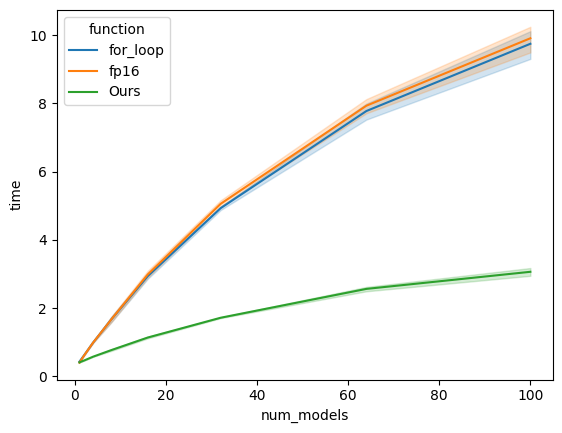

In [18]:
dist = "zipf:1.5"
df = new_df[new_df["distribution"] == dist]
sns.lineplot(data=df, x="num_models", y="time", hue="function")